# Assignment-2
Due date: Oct. 3

Points: 95

In this assignment, you are working at a hypothetical bank called `InvRes` Bank offering consulting service to its customers. Your first aim is to find out the risk level of these stocks relative to the market index.



To accomplish this task, you will use Capital Asset Pricing Model (CAPM), which dates back to 1960’s, yet still powerful tool in finance due to its intuitive and easy-to-apply nature. As it is completely white-box model, it makes it easy to understand and explain. 

Once you estimate the slope coefficient (beta) and intercept term (alpha) of the CAPM model, you will be able to assess if the asset is risky compared to market. Then, your next task is to find out the stock with best risk-return relationship. To do that, you are required to employ the following ratios:

• Sharpe ratio

• Treynor ratio

You can pick any two stocks and market index other than those we have in the class.

This assignment will be divided into 4 milestones.

1. Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic. (25 pts)

2. Examine the data through visualization and correlation. Calculate returns of the stocks and market. (25 pts)

3. Run Capital Asset Pricing Model and interpret the results. (25 pts)

4. Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude. (25 pts)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

### 1.Accessing the data and obtain daily risk-free rate. Besides, analyze data via summary statistic

In [ ]:
stocks = ['DXC','WIX','^GSPC']
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,4,1)
stock_price = yf.download(stocks,start=start,end = end,interval='1d')

[*********************100%***********************]  3 of 3 completed


In [ ]:
stock_price.head()

Adj Close                               Close              \
                  DXC         WIX        ^GSPC        DXC         WIX   
Date                                                                    
2021-01-04  25.920000  253.149994  3700.649902  25.920000  253.149994   
2021-01-05  26.879999  259.250000  3726.860107  26.879999  259.250000   
2021-01-06  26.450001  247.860001  3748.139893  26.450001  247.860001   
2021-01-07  28.910000  252.479996  3803.790039  28.910000  252.479996   
2021-01-08  29.600000  263.529999  3824.679932  29.600000  263.529999   

                              High                                 Low  \
                  ^GSPC        DXC         WIX        ^GSPC        DXC   
Date                                                                     
2021-01-04  3700.649902  28.139999  254.259995  3769.989990  25.559999   
2021-01-05  3726.860107  27.350000  259.670013  3737.830078  26.000000   
2021-01-06  3748.139893  27.430000  254.389999  3783.040039  25.870001   
2021-01-07  3803.790039  29.610001  257.010010  3811.550049  27.750000   
2021-01-08  3824.679932  30.139999  265.290009  3826.689941  28.920000   

                                          Open                           \
                   WIX        ^GSPC        DXC         WIX        ^GSPC   
Date                                                                      
2021-01-04  243.125000  3662.709961  26.950001  253.320007  3764.610107   
2021-01-05  249.789993  3695.070068  26.209999  250.080002  3698.020020   
2021-01-06  247.509995  3705.340088  25.870001  252.940002  3712.199951   
2021-01-07  249.940002  3764.709961  29.010000  250.100006  3764.709961   
2021-01-08  255.199997  3783.600098  29.200001  255.199997  3815.050049   

              Volume                      
                 DXC     WIX       ^GSPC  
Date                                      
2021-01-04   7401500  525700  5006680000  
2021-01-05   3705500  399400  4582620000  
2021-01-06   4121400  669000  6049970000  
2021-01-07  12353700  477100  5080870000  
2021-01-08   7229400  626900  4764180000

In [ ]:
stock_price = stock_price['Close']

In [ ]:
stock_price.describe()

,DXC,WIX,^GSPC
count,61.000000,61.000000,61.000000
mean,27.429016,285.581147,3865.706899
std,1.584725,31.439825,71.221421
min,24.889999,241.279999,3700.649902
25%,25.920000,259.250000,3811.149902
50%,27.719999,279.760010,3875.439941
75%,28.660000,302.160004,3915.590088
max,31.260000,353.089996,3974.540039


the above table describes the summary of the stock prices of DXC and WIX.it is obserevd that the standarad deviation of DXC is less compared to WIX.and min and max stock prices for DXC is 24.88 and 31.26 where as min and max stock prices for WIX are 241.27 and 353.08 respectively

In [ ]:
stock_price = stock_price.rename({'^GSPC' :'GSPC'},  axis='columns')

In [ ]:
stock_price.head()

,DXC,WIX,GSPC
Date,,,
2021-01-04,25.920000,253.149994,3700.649902
2021-01-05,26.879999,259.250000,3726.860107
2021-01-06,26.450001,247.860001,3748.139893
2021-01-07,28.910000,252.479996,3803.790039
2021-01-08,29.600000,263.529999,3824.679932


In [ ]:
!pip3 install fredapi

In [ ]:
from fredapi import Fred
fred = Fred(api_key='90117364daaa3be0b7c456016efc430a')

In [ ]:
fred.search('DGS3MO')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
DGS3MO,Daily,D,DGS3MO,2022-09-28 15:23:10-05:00,For further information regarding treasury con...,2022-09-27,1981-09-01,73,2022-09-29,2022-09-29,Not Seasonally Adjusted,NSA,Market Yield on U.S. Treasury Securities at 3-...,Percent,%


In [ ]:
risk_free = fred.get_series('DGS3MO')
risk_free

1981-09-01    17.01
1981-09-02    16.65
1981-09-03    16.96
1981-09-04    16.64
1981-09-07      NaN
              ...  
2022-09-21     3.31
2022-09-22     3.29
2022-09-23     3.24
2022-09-26     3.39
2022-09-27     3.35
Length: 10716, dtype: float64

### 2.Examine the data through visualization and correlation. Calculate returns of the stocks and market.

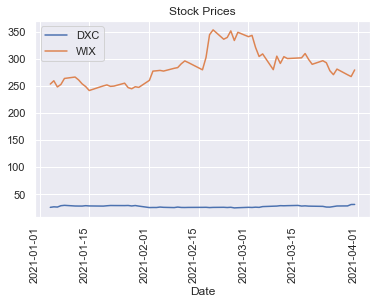

In [ ]:
stock_price.loc[:,['DXC','WIX']].plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

from above grapgh it is observede that stock price of DXC is constant whereas as stock price of WIX is varying

In [ ]:
stock_price.corr()

,DXC,WIX,GSPC
DXC,1.000000,-0.516586,0.105932
WIX,-0.516586,1.000000,0.449696
GSPC,0.105932,0.449696,1.000000


correlation coefficient between DXC and WIX is negative(-0.51) it indicates that the two stocks have no correlation

**Remark:** They are negatively correlated.

In [ ]:
returns = stock_price.pct_change()
returns.dropna(inplace=True)

In [ ]:
risk_free = risk_free['2021-01-01':'2021-04-01']
risk_free = risk_free/90 

In [ ]:
risk_free.dropna(inplace=True)

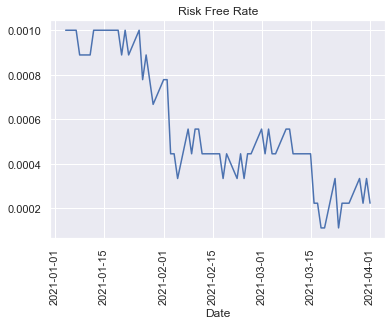

In [ ]:
plt.plot(risk_free)
plt.title('Risk Free Rate')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [ ]:
returns.columns

Index(['DXC', 'WIX', 'GSPC'], dtype='object')

In [ ]:
for i in returns.columns:
    returns[f'excess_return_{i}'] = returns[i] - risk_free

In [ ]:
returns.head()

,DXC,WIX,GSPC,excess_return_DXC,excess_return_WIX,excess_return_GSPC
Date,,,,,,
2021-01-05,0.037037,0.024096,0.007083,0.036037,0.023096,0.006083
2021-01-06,-0.015997,-0.043934,0.005710,-0.016997,-0.044934,0.004710
2021-01-07,0.093006,0.018640,0.014847,0.092006,0.017640,0.013847
2021-01-08,0.023867,0.043766,0.005492,0.022978,0.042877,0.004603
2021-01-11,-0.040878,0.009790,-0.006555,-0.041767,0.008901,-0.007444


### 3.Run Capital Asset Pricing Model and interpret the results.

In [ ]:
import statsmodels.api as sm

In [ ]:
y_dxc = returns['excess_return_DXC']
y_dxc.head()


Date
2021-01-05    0.036037
2021-01-06   -0.016997
2021-01-07    0.092006
2021-01-08    0.022978
2021-01-11   -0.041767
Name: excess_return_DXC, dtype: float64

In [ ]:
X = returns['excess_return_GSPC']
X.head()

Date
2021-01-05    0.006083
2021-01-06    0.004710
2021-01-07    0.013847
2021-01-08    0.004603
2021-01-11   -0.007444
Name: excess_return_GSPC, dtype: float64

In [ ]:
X = sm.add_constant(X, prepend=False)
capm_dxc = sm.OLS(y_dxc, X)
capm_result_dxc = capm_dxc.fit()

In [ ]:
capm_result_dxc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_DXC   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     9.491
Date:                Thu, 29 Sep 2022   Prob (F-statistic):            0.00316
Time:                        14:32:35   Log-Likelihood:                 129.53
No. Observations:                  60   AIC:                            -255.1
Df Residuals:                      58   BIC:                            -250.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.1580      0.376      3.081      0.003       0.406       1.910
const                  0.0022      0.004      0.610      0.545      -0.005       0.010
==============================================================================
Omnibus:                       16.347   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.198
Skew:                          -0.337   Prob(JB):                     3.46e-16
Kurtosis:                       8.294   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_wix = returns['excess_return_WIX']
y_wix.head()

Date
2021-01-05    0.023096
2021-01-06   -0.044934
2021-01-07    0.017640
2021-01-08    0.042877
2021-01-11    0.008901
Name: excess_return_WIX, dtype: float64

In [ ]:
X = returns['excess_return_GSPC']
X.head()

Date
2021-01-05    0.006083
2021-01-06    0.004710
2021-01-07    0.013847
2021-01-08    0.004603
2021-01-11   -0.007444
Name: excess_return_GSPC, dtype: float64

In [ ]:
X = sm.add_constant(X, prepend=False)
capm_wix = sm.OLS(y_wix, X)
capm_result_wix = capm_wix.fit()

In [ ]:
capm_result_wix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      excess_return_WIX   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     11.24
Date:                Thu, 29 Sep 2022   Prob (F-statistic):            0.00141
Time:                        14:35:18   Log-Likelihood:                 113.39
No. Observations:                  60   AIC:                            -222.8
Df Residuals:                      58   BIC:                            -218.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
excess_return_GSPC     1.6494      0.492      3.353      0.001       0.665       2.634
const                  0.0008      0.005      0.157      0.876      -0.009       0.010
==============================================================================
Omnibus:                       17.064   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.849
Skew:                           0.912   Prob(JB):                     3.30e-07
Kurtosis:                       5.935   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from the results of CAPM it is observed that the beta for dxc is 1.15 which indicates that 1-unit increase in S&P-500 results in an increase of 1.15 times the DXC and beta for wix is 1.64 which indicates that 1-unit increase in S&P-500 results in an increase 1.64 times WIX.

from the results of CAPM for DXc and WIX,it is obserevd that WIX is more risker than DXC

**Remark:** Please mention the level of significance for rejecting the null.
(-5 Points)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
betas = [capm_result_dxc.params[0],
         capm_result_wix.params[0]]
betas

[1.1579919524878957, 1.6493670686511623]

In [ ]:
def SML(rf, ret, beta):
    asset_ret = [rf + (rm - rf) * i for i in betas]
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('SML')
    plt.plot(1, ret, 'ro')

In [ ]:
rf = risk_free.mean()
rm = returns['GSPC'].mean()

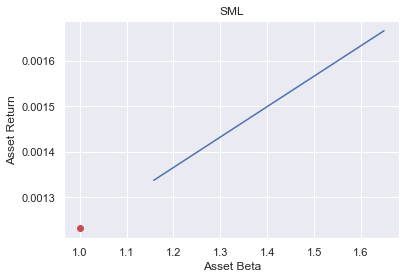

In [ ]:
SML(rf, rm, betas)

Given the beta, if the stock locates below the SML, this implies that stock has a higher return per unit of risk assumed. Hence, it can be concluded that the stock is overvalued and decide to sell the stock. Conversely, if the stock locates above the SML, stock has a lower return per unit of risk assumed, which is considered to be undervalued and buying a stock would be wise choice.

### 4.Calculate Sharpe and Treynor measures. Compare and interpret the results and conclude.

In [ ]:
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = returns.iloc[:, j].mean() - rf / np.std(returns.iloc[:, j])
        # sharpe_ratios[i] = (returns.iloc[:,j].mean()-rf)/np.std(returns.iloc[:,j])
    return sharpe_ratios

**Remark:** The numerator on the RHS should be wrapped in the parenthesis before dividing.



In [ ]:
returns.columns[:2]

Index(['DXC', 'WIX'], dtype='object')

In [ ]:
stocks = returns.columns[:2]
sharpe_ratios = sharpe(stocks, rf, 3)
sharpe_ratios

{'DXC': -0.015092688410504197, 'WIX': -0.011661442193957056}

from the sharpe ratios it is obserevd that sharpe ratio for  DXC is -0.015 and WIX is -0.11.sharpe ratio for WIX is more compared to DXC.it implies investing in WIX is preferable compared to DXC considering risks

In [ ]:
df_betas = pd.DataFrame(betas)

In [ ]:
df_betas.columns = ['betas']


In [ ]:
df_betas.index = returns.columns[:2]


In [ ]:
df_betas

,betas
DXC,1.157992
WIX,1.649367


In [ ]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, j in enumerate(stocks):
        treynor_ratios[j] = returns.iloc[:, i].mean() - rf / df_betas['betas'][j]
    return treynor_ratios

**Remark:** The numerator on the RHS should be wrapped in the parenthesis before dividing.

In [ ]:
treynor_ratios = treynor(stocks, rf, 3)
treynor_ratios

{'DXC': 0.0030932645688590502, 'WIX': 0.002080632672301292}

treynor ratio for DXC is more compared to WIX .higher treynor ratio indicates more suitable investment.it indicates investing in DXC is advisable compared to investing tin WIX considering risks.

## ref:
1.http://localhost:8888/notebooks/Downloads/CAPM.ipynb